In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Wczytywanie dataset, z których będziemy korzystać

Naszym celem jest stworzenie wykresu przepływowego.

In [142]:
main=pd.read_csv('pokemon_data.csv')
main=main.set_index('name')

capt=pd.read_csv('capture_flee_rate')
capt=capt.rename(columns={'Pokémon':'name'}).set_index('name')

evol=pd.read_csv('evolution_stage_map.csv')
evol=evol.set_index('name')

paths=pd.read_csv('evolution_paths.csv')

##  Łączenie database w jeden, do zbiorów równoległych

In [143]:
df=pd.merge( 
    main, evol,
    left_index=True, 
    right_index=True, 
    how='inner'
    )

df = pd.merge(
    df, 
    capt[['Movement type']], 
    left_index=True, 
    right_index=True, 
    how='inner'
)
df


,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,...,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Evolution_Stage,Movement type
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,NaN,...,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,1,Jump
Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,NaN,...,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,2,Jump
Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,NaN,...,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,3,Jump
Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,NaN,...,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,1,Jump
Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,NaN,...,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,2,Jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ursaluna,901,8,Ground,Normal,Peat Pokémon,2.4,290.0,Guts,Bulletproof,Unnerve,...,275,Medium Fast,Field,NaN,50.0,50.0,20,Ordinary,3,Jump
Basculegion,902,8,Water,Ghost,Big Fish Pokémon,3.0,110.0,Swift Swim,Adaptability,Mold Breaker,...,265,Medium Fast,Water 2,NaN,100.0,0.0,20,Ordinary,2,Hovering
Sneasler,903,8,Fighting,Poison,Free Climb Pokémon,1.3,43.0,Pressure,Unburden,Poison Touch,...,102,Medium Slow,Field,NaN,50.0,50.0,20,Ordinary,2,Jump


In [144]:

df=df.reset_index().dropna(subset=['name', 'Evolution_Stage', 'type1', 'Movement type'])
df['Evolution_Stage'] = df['Evolution_Stage'].astype(int)

df['Dual type'] = df['type2'].notna()
df

,name,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,...,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Evolution_Stage,Movement type,Dual type
0,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,1,Jump,True
1,Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,2,Jump,True
2,Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,3,Jump,True
3,Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,1,Jump,False
4,Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,2,Jump,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Ursaluna,901,8,Ground,Normal,Peat Pokémon,2.4,290.0,Guts,Bulletproof,...,Medium Fast,Field,NaN,50.0,50.0,20,Ordinary,3,Jump,True
884,Basculegion,902,8,Water,Ghost,Big Fish Pokémon,3.0,110.0,Swift Swim,Adaptability,...,Medium Fast,Water 2,NaN,100.0,0.0,20,Ordinary,2,Hovering,True
885,Sneasler,903,8,Fighting,Poison,Free Climb Pokémon,1.3,43.0,Pressure,Unburden,...,Medium Slow,Field,NaN,50.0,50.0,20,Ordinary,2,Jump,True
886,Overqwil,904,8,Dark,Poison,Pin Cluster Pokémon,2.5,60.5,Poison Point,Swift Swim,...,Medium Fast,Water 2,NaN,50.0,50.0,20,Ordinary,2,Hovering,True


In [145]:
paths['Has Stage 2'] = paths['Stage 2'].notna()
paths[' Has Stage 3'] = paths['Stage 3'].notna()
paths

,Stage 1,Stage 2,Stage 3,Has Stage 2,Has Stage 3
0,Bulbasaur,Ivysaur,Venusaur,True,True
1,Charmander,Charmeleon,Charizard,True,True
2,Squirtle,Wartortle,Blastoise,True,True
3,Caterpie,Metapod,Butterfree,True,True
4,Weedle,Kakuna,Beedrill,True,True
...,...,...,...,...,...
554,Miraidon,NaN,NaN,False,False
555,Walking-wake,NaN,NaN,False,False
556,Iron-leaves,NaN,NaN,False,False
557,Poltchageist,Sinistcha,NaN,True,False


In [146]:
paths['Evolves to Stage 2'] = paths['Stage 2'].notna()
paths['Evolves to Stage 3'] = paths['Stage 3'].notna()
# Pobieramy wszystkie Pokemony ze wszystkich etapów i przypisujemy im flagi ich rodziny
cols_to_melt = ['Stage 1', 'Stage 2', 'Stage 3']
melted = paths.melt(id_vars=['Evolves to Stage 2', 'Evolves to Stage 3'], value_vars=cols_to_melt, value_name='name')

# Usuwamy puste wiersze (tam gdzie np. nie było Stage 3) i duplikaty
# (Duplikaty mogą być przy Eevee - bierzemy po prostu 'True' jeśli chociaż jedna ścieżka to ma)
melted = melted.dropna(subset=['name'])
melted = melted.sort_values(['Evolves to Stage 3', 'Evolves to Stage 2'], ascending=False)
melted = melted.drop_duplicates(subset=['name'], keep='first')

# 4. Łączenie z głównym datasetem
# Używamy left join, żeby nie zgubić Pokemonów z main, które nie mają ewolucji (dostaną NaN, które zamienimy na False)
df_final = pd.merge(df, melted[['name', 'Evolves to Stage 2', 'Evolves to Stage 3']], on='name', how='left')

# Wypełnienie braków (Pokemony bez ścieżek, np. Legendy, są 1-etapowe)
df_final['Evolves to Stage 2'] = df_final['Evolves to Stage 2'].fillna(False)
df_final['Evolves to Stage 3'] = df_final['Evolves to Stage 3'].fillna(False)

df_final

,name,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,...,egg_group2,percent_male,percent_female,egg_cycles,special_group,Evolution_Stage,Movement type,Dual type,Evolves to Stage 2,Evolves to Stage 3
0,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,Monster,87.5,12.5,20,Ordinary,1,Jump,True,True,True
1,Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,Monster,87.5,12.5,20,Ordinary,2,Jump,True,True,True
2,Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,Monster,87.5,12.5,20,Ordinary,3,Jump,True,True,True
3,Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,Monster,87.5,12.5,20,Ordinary,1,Jump,False,True,True
4,Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,Monster,87.5,12.5,20,Ordinary,2,Jump,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Ursaluna,901,8,Ground,Normal,Peat Pokémon,2.4,290.0,Guts,Bulletproof,...,NaN,50.0,50.0,20,Ordinary,3,Jump,True,True,True
806,Basculegion,902,8,Water,Ghost,Big Fish Pokémon,3.0,110.0,Swift Swim,Adaptability,...,NaN,100.0,0.0,20,Ordinary,2,Hovering,True,True,False
807,Sneasler,903,8,Fighting,Poison,Free Climb Pokémon,1.3,43.0,Pressure,Unburden,...,NaN,50.0,50.0,20,Ordinary,2,Jump,True,True,False
808,Overqwil,904,8,Dark,Poison,Pin Cluster Pokémon,2.5,60.5,Poison Point,Swift Swim,...,NaN,50.0,50.0,20,Ordinary,2,Hovering,True,True,False


## Tworzenie wykresu

In [147]:
def parallel_sets(df, title, cat_cols, color_col=None, cmap='Set1'):
    """
    Rysuje wykres Parallel Categories z szerokościami proporcjonalnymi do liczności.
    """
    
    df_agg = df.groupby(cat_cols).size().reset_index(name='__count__')
        
    # Sortowanie: pomaga w czytelnym ułożeniu wstęg (minimalizuje "spaghetti")
    sort_cols = [color_col] + cat_cols if color_col else cat_cols
    df_agg = df_agg.sort_values(by=sort_cols, ascending=False)
    
    # 2. Obliczanie pozycji Y dla bloków kategorii
    # Chcemy, aby kategorie układały się na osiach Y, a ich wysokość zależała od liczności
    y_starts = {}
    total_count = df_agg['__count__'].sum()
    gap = total_count * 0.05  # 5% odstępu między kategoriami
    
    for col in cat_cols:
        # Sumujemy liczności dla każdej unikalnej wartości w kolumnie
        cat_counts = df_agg.groupby(col)['__count__'].sum()
        sorted_cats = sorted(cat_counts.index, reverse=True) # Sortowanie etykiet
        
        current_y = 0
        y_starts[col] = {}
        for cat in sorted_cats:
            y_starts[col][cat] = current_y
            current_y += cat_counts[cat] + gap

    # Kursor śledzi, na jakiej wysokości jesteśmy wewnątrz każdego bloku kategorii
    y_cursors = {col: y_starts[col].copy() for col in cat_cols}
    
# 3. Rysowanie
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # --- PRZYGOTOWANIE KOLORÓW DYSKRETNYCH ---
    if color_col:
        # Pobieramy unikalne wartości z kolumny
        unique_vals = sorted(df_agg[color_col].unique())
        # Pobieramy obiekt palety (np. Set1)
        cmap_obj = plt.get_cmap(cmap)
        
        # Tworzymy słownik: unikalna wartość -> kolejny kolor z palety (0, 1, 2...)
        # Modulo (i % cmap_obj.N) zabezpiecza przed brakiem kolorów, gdy kategorii jest b. dużo
        color_lookup = {val: cmap_obj(i % cmap_obj.N) for i, val in enumerate(unique_vals)}
    
    # Funkcja generująca krzywą sigmoidalną ("esownicę")
    def get_sigmoid_points(x_start, x_end, y_start, y_end, steps=100):
        t = np.linspace(0, 1, steps)
        x = x_start + (x_end - x_start) * t
        # Wzór sigmoidy: steruje gładkością przejścia
        sigmoid = 1 / (1 + np.exp(-12 * (t - 0.5)))
        y = y_start + (y_end - y_start) * sigmoid
        return x, y
        
        return x, y

    # Rysujemy wstęgę dla każdego wiersza ze zgrupowanych danych
    for _, row in df_agg.iterrows():
        count = row['__count__']
        
        # Dobieramy kolor ze słownika
        if color_col:
            color = color_lookup[row[color_col]]
        else:
            color = 'gray'
            
        for i in range(len(cat_cols) - 1):
            col1, col2 = cat_cols[i], cat_cols[i+1]
            val1, val2 = row[col1], row[col2]
            
            # Pobieramy aktualną wysokość startową dla danej kategorii
            y1 = y_cursors[col1][val1]
            y2 = y_cursors[col2][val2]
            
            # Obliczamy krzywe
            x, y_bot = get_sigmoid_points(i, i+1, y1, y2)
            _, y_top = get_sigmoid_points(i, i+1, y1 + count, y2 + count)
            
            # Wypełniamy przestrzeń
            # ustawienie edgecolor konieczne żeby to działało
            ax.fill_between(x, y_bot, y_top, color=color, alpha=0.6, edgecolor=None) 
            
        # Po narysowaniu całej ścieżki podnosimy kursory w użytych blokach
        for col in cat_cols:
            y_cursors[col][row[col]] += count

# 4. Opisy osi i etykiet
    for i, col in enumerate(cat_cols):
        # Tytuł kolumny na górze
        ax.text(i, -gap/2, col, ha='center', va='top', fontweight='bold', fontsize=12)
        
        # Iterujemy po kategoriach, żeby narysować belki i podpisy
        for cat, start_y in y_starts[col].items():
            h = df_agg[df_agg[col] == cat]['__count__'].sum()
            center_y = start_y + h / 2
            
            # ZMIANA: Używamy ax.bar (prostokąt) zamiast vlines.
            # width=0.05 to szerokość belki (możesz dać 0.02 dla cieńszej, 0.1 dla grubszej)
            # color='black', alpha=1.0 daje pełną czerń
            ax.bar(i, h, bottom=start_y, width=0.005, color='black', alpha=1, align='center')
            
            # Etykieta z nazwą kategorii
            ax.text(i, center_y, str(cat), ha='center', va='center', 
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.2'))


    ax.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()


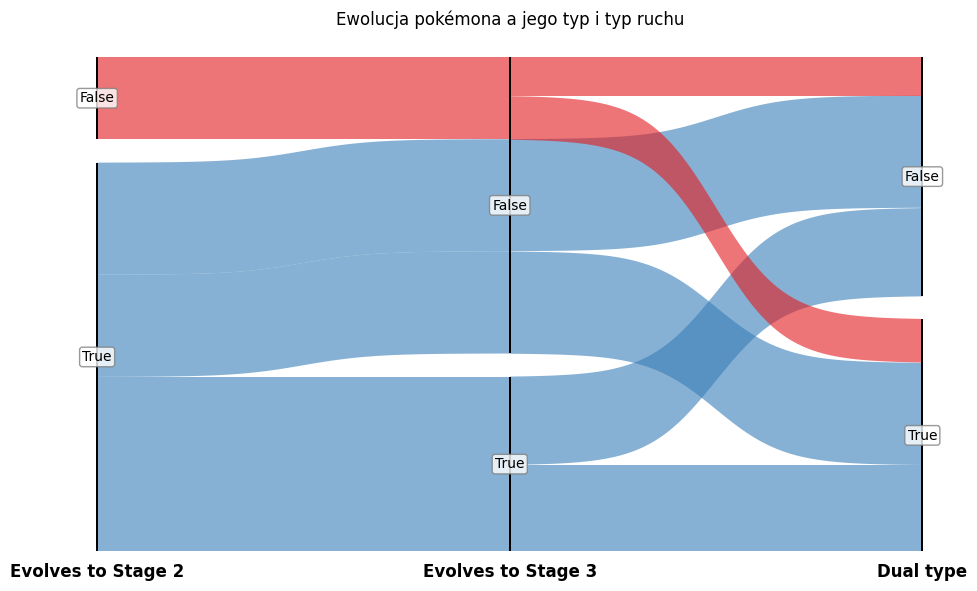

In [150]:
parallel_sets(df_final, title='Ewolucja pokémona a jego typ i typ ruchu', cat_cols=['Evolves to Stage 2', 'Evolves to Stage 3', 'Dual type'], color_col='Evolves to Stage 2', cmap='Set1')

In [ ]:
def parallel_sets_vertical(df, title, cat_cols, color_col=None, cmap='Set1'):
    """
    Rysuje wykres Parallel Categories z przepływem z GÓRY na DÓŁ (Vertical).
    """
    
    # 1. Agregacja danych
    df_agg = df.groupby(cat_cols).size().reset_index(name='__count__')
        
    # Sortowanie
    sort_cols = [color_col] + cat_cols if color_col else cat_cols
    df_agg = df_agg.sort_values(by=sort_cols, ascending=False)
    
    # 2. Obliczanie pozycji X (szerokości) dla bloków kategorii
    # Teraz kategorie są na osi Y, a ich szerokość na osi X zależy od liczności
    x_starts = {}
    total_count = df_agg['__count__'].sum()
    gap = total_count * 0.05  # 5% odstępu między kategoriami w poziomie
    
    for col in cat_cols:
        cat_counts = df_agg.groupby(col)['__count__'].sum()
        sorted_cats = sorted(cat_counts.index, reverse=True) # Sortowanie etykiet
        
        current_x = 0
        x_starts[col] = {}
        # Układamy kategorie od lewej do prawej
        for cat in sorted_cats:
            x_starts[col][cat] = current_x
            current_x += cat_counts[cat] + gap

    # Kursor śledzi, na jakiej szerokości (X) jesteśmy wewnątrz każdego bloku
    x_cursors = {col: x_starts[col].copy() for col in cat_cols}
    
    # 3. Rysowanie
    # Zmieniamy wymiary figury, żeby była wyższa niż szersza (lepiej pasuje do pionowego flow)
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # --- KOLORY ---
    if color_col:
        unique_vals = sorted(df_agg[color_col].unique())
        cmap_obj = plt.get_cmap(cmap)
        color_lookup = {val: cmap_obj(i % cmap_obj.N) for i, val in enumerate(unique_vals)}
    
    # --- ZMODYFIKOWANA SIGMOIDA (Pionowa) ---
    def get_vertical_sigmoid_points(y_start, y_end, x_start, x_end, steps=100):
        # t idzie liniowo od 0 do 1 (reprezentuje postęp w pionie, Y)
        t = np.linspace(0, 1, steps)
        
        # Y zmienia się liniowo od y_start do y_end
        y = y_start + (y_end - y_start) * t
        
        # Sigmoida steruje zmianą X (szerokości)
        sigmoid = 1 / (1 + np.exp(-12 * (t - 0.5)))
        x = x_start + (x_end - x_start) * sigmoid
        
        return x, y

    # Rysujemy wstęgę
    for _, row in df_agg.iterrows():
        count = row['__count__']
        
        if color_col:
            color = color_lookup[row[color_col]]
        else:
            color = 'gray'
            
        for i in range(len(cat_cols) - 1):
            col1, col2 = cat_cols[i], cat_cols[i+1]
            val1, val2 = row[col1], row[col2]
            
            # Pobieramy pozycje startowe X (szerokość)
            x1 = x_cursors[col1][val1]
            x2 = x_cursors[col2][val2]
            
            # Pozycje Y to po prostu indeksy kolumn (0, 1, 2...)
            y_start_level = i
            y_end_level = i + 1
            
            # Obliczamy krzywe (zwracają tablice x i y)
            # x_left_curve to lewa krawędź wstęgi
            x_left_curve, y_coords = get_vertical_sigmoid_points(y_start_level, y_end_level, x1, x2)
            
            # x_right_curve to prawa krawędź wstęgi (przesunięta o count)
            x_right_curve, _ = get_vertical_sigmoid_points(y_start_level, y_end_level, x1 + count, x2 + count)
            
            # ZMIANA: fill_betweenx zamiast fill_between
            # Wypełniamy obszar wzdłuż osi Y, pomiędzy krzywą lewą (x_left) a prawą (x_right)
            ax.fill_betweenx(y_coords, x_left_curve, x_right_curve, color=color, alpha=0.6, edgecolor=None)
            
        # Aktualizacja kursorów X
        for col in cat_cols:
            x_cursors[col][row[col]] += count

    # 4. Opisy osi i etykiet
    for i, col in enumerate(cat_cols):
        # Tytuł kategorii (np. "Generation", "Type") po lewej stronie osi Y
        # ax.text(-gap, i, col, ha='right', va='center', fontweight='bold', fontsize=12, rotation=0)
        # Opcjonalnie: Tytuł kategorii nad belką (ale w pionie może być ciasno)
        ax.text(total_count/2, i - 0.03, col, ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        # Iterujemy po wartościach kategorii (belki i etykiety)
        for cat, start_x in x_starts[col].items():
            w = df_agg[df_agg[col] == cat]['__count__'].sum()
            center_x = start_x + w / 2
            
            # ZMIANA: ax.barh (poziome belki)
            # y=i (poziom), width=w (długość paska), left=start_x (początek paska)
            ax.barh(i, w, left=start_x, height=0.02, color='black', alpha=1, align='center')
            
            # Etykieta z nazwą wartości (np. "Gen 1", "Fire")
            ax.text(center_x, i, str(cat), ha='center', va='center', 
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.2'),
                    fontsize=9)
            
            

    ax.axis('off')
    
    # ZMIANA: Odwracamy oś Y, aby 0 (pierwsza kolumna) było na górze
    ax.invert_yaxis()
    
    plt.title(title, fontsize=20, pad=20)
    plt.tight_layout()
    # plt.savefig('parallel_vertical.png') # Opcjonalnie zapisz
    plt.show()


In [ ]:
def parallel_sets_vertical(df, title, cat_cols, color_col=None, cmap='Set1'):
    """
    Rysuje wykres Parallel Categories z przepływem z GÓRY na DÓŁ (Vertical).
    """
    
    # 1. Agregacja danych
    df_agg = df.groupby(cat_cols).size().reset_index(name='__count__')
        
    # Sortowanie
    sort_cols = [color_col] + cat_cols if color_col else cat_cols
    df_agg = df_agg.sort_values(by=sort_cols, ascending=False)
    
    # 2. Obliczanie pozycji X (szerokości) dla bloków kategorii
    # Teraz kategorie są na osi Y, a ich szerokość na osi X zależy od liczności
    x_starts = {}
    total_count = df_agg['__count__'].sum()
    gap = total_count * 0.05  # 5% odstępu między kategoriami w poziomie
    
    for col in cat_cols:
        cat_counts = df_agg.groupby(col)['__count__'].sum()
        sorted_cats = sorted(cat_counts.index, reverse=True) # Sortowanie etykiet
        
        current_x = 0
        x_starts[col] = {}
        # Układamy kategorie od lewej do prawej
        for cat in sorted_cats:
            x_starts[col][cat] = current_x
            current_x += cat_counts[cat] + gap

    # Kursor śledzi, na jakiej szerokości (X) jesteśmy wewnątrz każdego bloku
    x_cursors = {col: x_starts[col].copy() for col in cat_cols}
    
    # 3. Rysowanie
    # Zmieniamy wymiary figury, żeby była wyższa niż szersza (lepiej pasuje do pionowego flow)
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # --- KOLORY ---
    if color_col:
        unique_vals = sorted(df_agg[color_col].unique())
        cmap_obj = plt.get_cmap(cmap)
        color_lookup = {val: cmap_obj(i % cmap_obj.N) for i, val in enumerate(unique_vals)}
    
    # --- ZMODYFIKOWANA SIGMOIDA (Pionowa) ---
    def get_vertical_sigmoid_points(y_start, y_end, x_start, x_end, steps=100):
        # t idzie liniowo od 0 do 1 (reprezentuje postęp w pionie, Y)
        t = np.linspace(0, 1, steps)
        
        # Y zmienia się liniowo od y_start do y_end
        y = y_start + (y_end - y_start) * t
        
        # Sigmoida steruje zmianą X (szerokości)
        sigmoid = 1 / (1 + np.exp(-12 * (t - 0.5)))
        x = x_start + (x_end - x_start) * sigmoid
        
        return x, y

    # Rysujemy wstęgę
    for _, row in df_agg.iterrows():
        count = row['__count__']
        
        if color_col:
            color = color_lookup[row[color_col]]
        else:
            color = 'gray'
            
        for i in range(len(cat_cols) - 1):
            col1, col2 = cat_cols[i], cat_cols[i+1]
            val1, val2 = row[col1], row[col2]
            
            # Pobieramy pozycje startowe X (szerokość)
            x1 = x_cursors[col1][val1]
            x2 = x_cursors[col2][val2]
            
            # Pozycje Y to po prostu indeksy kolumn (0, 1, 2...)
            y_start_level = i
            y_end_level = i + 1
            
            # Obliczamy krzywe (zwracają tablice x i y)
            # x_left_curve to lewa krawędź wstęgi
            x_left_curve, y_coords = get_vertical_sigmoid_points(y_start_level, y_end_level, x1, x2)
            
            # x_right_curve to prawa krawędź wstęgi (przesunięta o count)
            x_right_curve, _ = get_vertical_sigmoid_points(y_start_level, y_end_level, x1 + count, x2 + count)
            
            # ZMIANA: fill_betweenx zamiast fill_between
            # Wypełniamy obszar wzdłuż osi Y, pomiędzy krzywą lewą (x_left) a prawą (x_right)
            ax.fill_betweenx(y_coords, x_left_curve, x_right_curve, color=color, alpha=0.6, edgecolor=None)
            
        # Aktualizacja kursorów X
        for col in cat_cols:
            x_cursors[col][row[col]] += count

    # 4. Opisy osi i etykiet
    for i, col in enumerate(cat_cols):
        # Tytuł Kategorii
        ax.text(0, i - 0.05, col, ha='left', va='bottom', fontweight='bold', fontsize=16)

        # Iterujemy po wartościach kategorii (belki i etykiety) - TYLKO RAZ
        for cat, start_x in x_starts[col].items():
            w = df_agg[df_agg[col] == cat]['__count__'].sum()
            center_x = start_x + w / 2
            
            # Czarna belka
            ax.barh(i, w, left=start_x, height=0.02, color='black', alpha=1, align='center')
            
            # Etykieta (usunięto zagnieżdżoną pętlę for cat... która była tutaj zbędna)
            ax.text(start_x, i - 0.01, str(cat), ha='left', va='bottom', fontsize=11, fontweight='normal')
            
    img = plt.imread('images/images/148.png')
    imagebox = OffsetImage(img, zoom=0.25) 
    ab = AnnotationBbox(imagebox, xy=(625, -0.11), frameon=False) #na minusie bo mamy odwrócone osie
    ax.add_artist(ab) 

    ax.axis('off')
    
    # ZMIANA: Odwracamy oś Y, aby 0 (pierwsza kolumna) było na górze
    ax.invert_yaxis()
    ax.text(0, -0.2, title, fontsize=25, fontweight='bold', ha='left') #tytuł ręcznie 
    
    
    plt.tight_layout()
    plt.savefig('ParallelSets.png')
    plt.show()
    


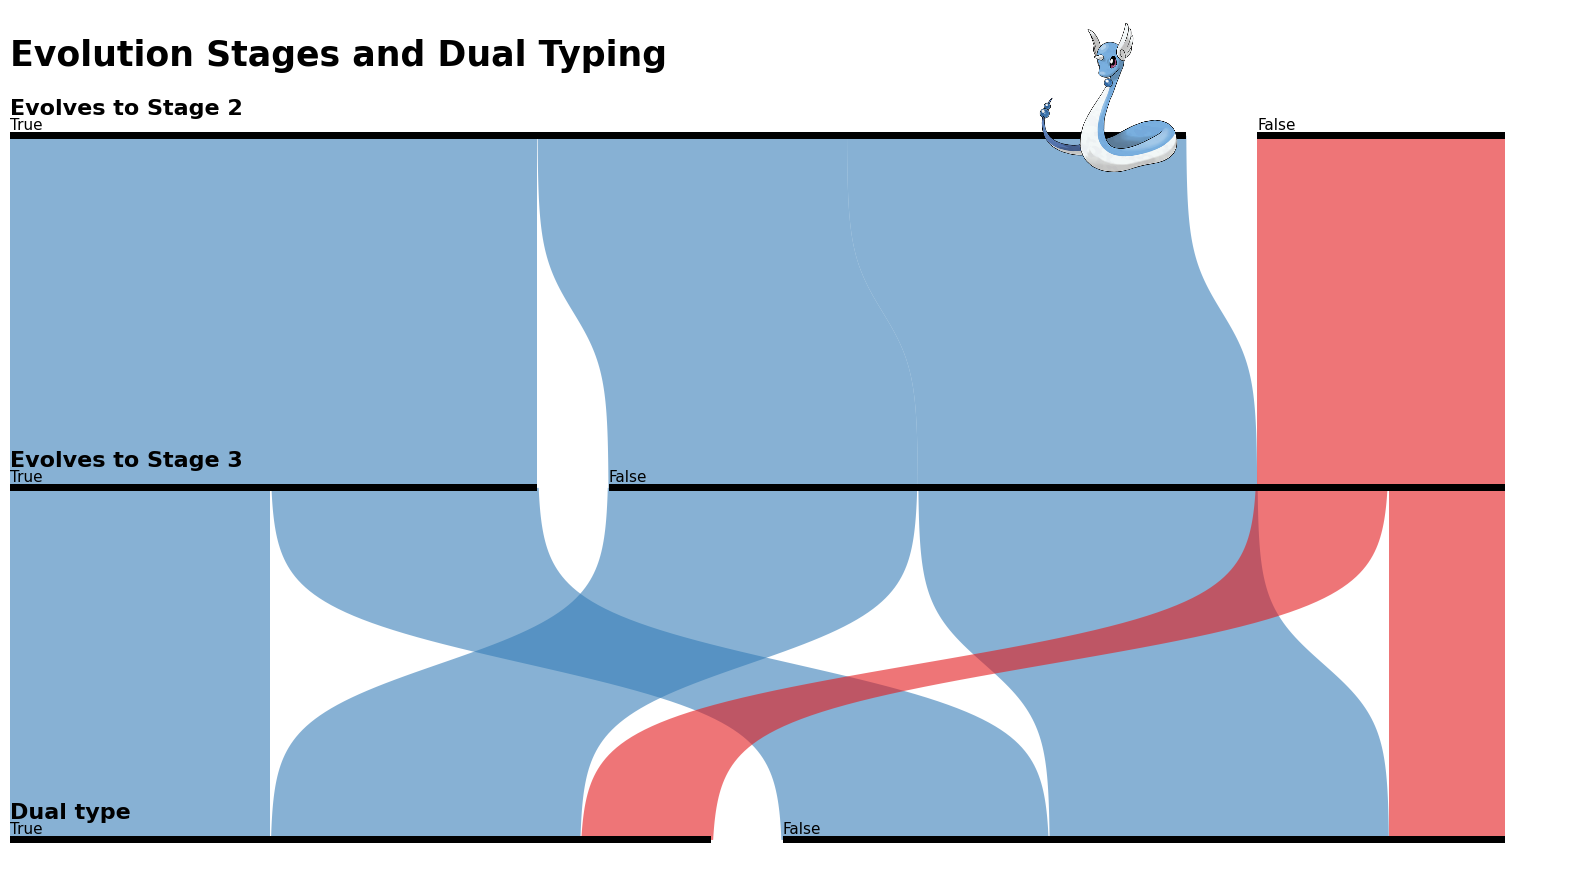

In [243]:
parallel_sets_vertical(df_final, title='Evolution Stages and Dual Typing', cat_cols=['Evolves to Stage 2', 'Evolves to Stage 3', 'Dual type'], color_col='Evolves to Stage 2', cmap='Set1')


